# 'Wait, was that a joke?' - Language Model Idenification of Absurdist Humor and Satire
## Daniel Rossetti

# Problem Statement:
You are hired by univesity researching the relatability of AI chat bots and their ability to identify nuances of human language, particularly humor.  You have been tasked with coming up with a language model that can identify humorous strings of text which are not structed in the format of a joke but are of similar structure to factual information.  Your job is to source the text to be evaluated and create a model which can idenifty humor.

In [1]:
# STANDARD IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# DATA PREP
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline


# MODELS:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

# METRICS & VISUALIZATIONS
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix,
                             recall_score, precision_score)

from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree




# DO WE USE THESE????
from nltk.corpus import stopwords
import re

# 1 - Read Previosuly Cleaned Data

In [2]:
reddit =pd.read_csv('../data/reddit_clean.csv')
print(reddit.shape)
reddit.head(2)

(10511, 2)


subreddit                                              title
0  TheOnion  Idiot Tornado Tears Harmlessly Through Empty F...
1  TheOnion  New Texas Law Requires Schools To Display Imag...

# 2 - Preprocessing

## 2.1 - Encode Target Variable - Positive Class: TheOnion | Negative Class: WorldNews

In [3]:
X = reddit['title']
y = reddit['subreddit']

In [4]:
y.map({'TheOnion': 1, 'worldnews': 0});

## 2.2 - Train Test Split:  80/20, Random State: 0

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3 - Initial Modeling

## 3.1 - Null Model (Target Variable Distributions)

In [6]:
y.value_counts(normalize=True)

TheOnion     0.516316
worldnews    0.483684
Name: subreddit, dtype: float64

## 3.2 - Initial Default Parameter Bagging Classifier

### 3.2.1 - With CountVectorizer

In [7]:
# Create Pipeline with count vectorizer and bagging classifier
bag_pipe_cvec = Pipeline([
    ('cvec', CountVectorizer()),
    ('bag', BaggingClassifier(random_state=0))
])

# Fit the model to training data
bag_pipe_cvec.fit(X_train, y_train)

# Create predictions:
preds_bag_cvec = bag_pipe_cvec.predict(X_test)

print(f'Training Data Accuracy: {bag_pipe_cvec.score(X_train, y_train)}')
print(f'Testing Data Accuracy: {bag_pipe_cvec.score(X_test, y_test)}')

Training Data Accuracy: 0.980732635585157
Testing Data Accuracy: 0.8240608654303376


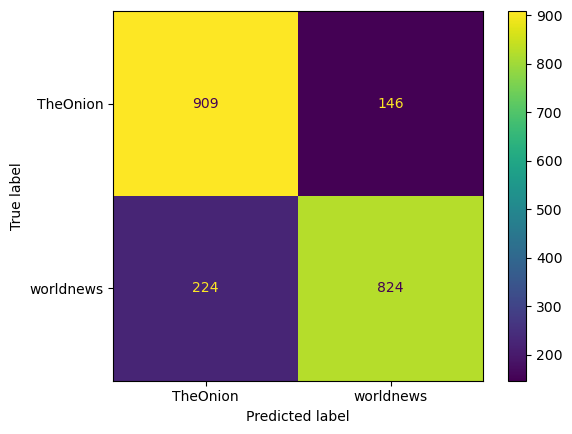

In [8]:
# Creating Metrics
tn_bag_cvec, fp_bag_cvec, fn_bag_cvec, tp_bag_cvec = confusion_matrix(y_test, preds_bag_cvec).ravel()

'''
NOTE:  Negative class is TheOnion as it is alphabetically first and thus the positive class is worldnews
'''

# Setting Up Confusion Matrix
ConfusionMatrixDisplay.from_estimator(bag_pipe_cvec, X_test, y_test)

### 3.2.2 - With TFIDF Vectorizer

In [9]:
# Create Pipeline with TFIDF vectorizer and bagging classifier
bag_pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('bag', BaggingClassifier(random_state=0))
])

# Fit the model to training data
bag_pipe_tvec.fit(X_train, y_train)

# Create predictions:
preds_bag_tvec = bag_pipe_tvec.predict(X_test)

print(f'Training Data Accuracy: {bag_pipe_tvec.score(X_train, y_train)}')
print(f'Testing Data Accuracy: {bag_pipe_tvec.score(X_test, y_test)}')

Training Data Accuracy: 0.9827545195052331
Testing Data Accuracy: 0.8059914407988588


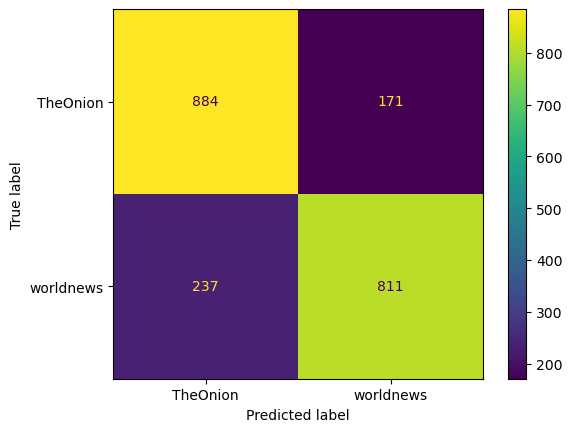

In [10]:
# Creating Metrics
tn_bag_tvec, fp_bag_tvec, fn_bag_tvec, tp_bag_tvec = confusion_matrix(y_test, preds_bag_tvec).ravel()

'''
NOTE:  Negative class is TheOnion as it is alphabetically first and thus the positive class is worldnews
'''

# Setting Up Confusion Matrix
ConfusionMatrixDisplay.from_estimator(bag_pipe_tvec, X_test, y_test)

In [45]:
tree_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('tree', DecisionTreeClassifier(max_depth = 20))
])

In [46]:
tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()),
                ('tree', DecisionTreeClassifier(max_depth=20))])

In [47]:
tree_pipe.score(X_train, y_train)

0.790080875356803

In [48]:
tree_pipe.score(X_test, y_test)

0.7522586780789349

In [38]:
tree_pipe[1]

DecisionTreeClassifier()

In [51]:
plt.figure(figsize=(200, 120))
plot_tree(tree_pipe[1], feature_names=tree_pipe[0].get_feature_names_out(), filled = True);